In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## General Data Information

In [3]:
df=pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
nums_rows, nums_cols = df.shape
print(f'Number of customers: {nums_rows}\ncustomer data columns: {nums_cols}')

Number of customers: 8469
customer data columns: 17


In [5]:
#Checking duplicate line
duplicate = df.duplicated().any()
duplicate

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:
cat_columns = df.select_dtypes(['object']).columns
print(cat_columns)

Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')


In [8]:
int_columns = df.select_dtypes(['int64']).columns
print(int_columns)

Index(['Ticket ID', 'Customer Age'], dtype='object')


In [9]:
float_columns = df.select_dtypes(['float']).columns
print(float_columns)

Index(['Customer Satisfaction Rating'], dtype='object')


## Cleaning the data

In [10]:

#Convert to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format = '%Y-%m-%d')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format = '%Y-%m-%d %H:%M:%S')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
df_ticket=df.copy()

In [12]:
df_ticket['Resolution'] = df_ticket['Resolution'].fillna('None')
df_ticket['First Response Time'] = df_ticket['First Response Time'].fillna('No response')
df_ticket['Time to Resolution'] = df_ticket['Time to Resolution'].fillna('No resolution')
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].fillna('No rating')

In [13]:
df_ticket.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


## Discovering distributions across columns

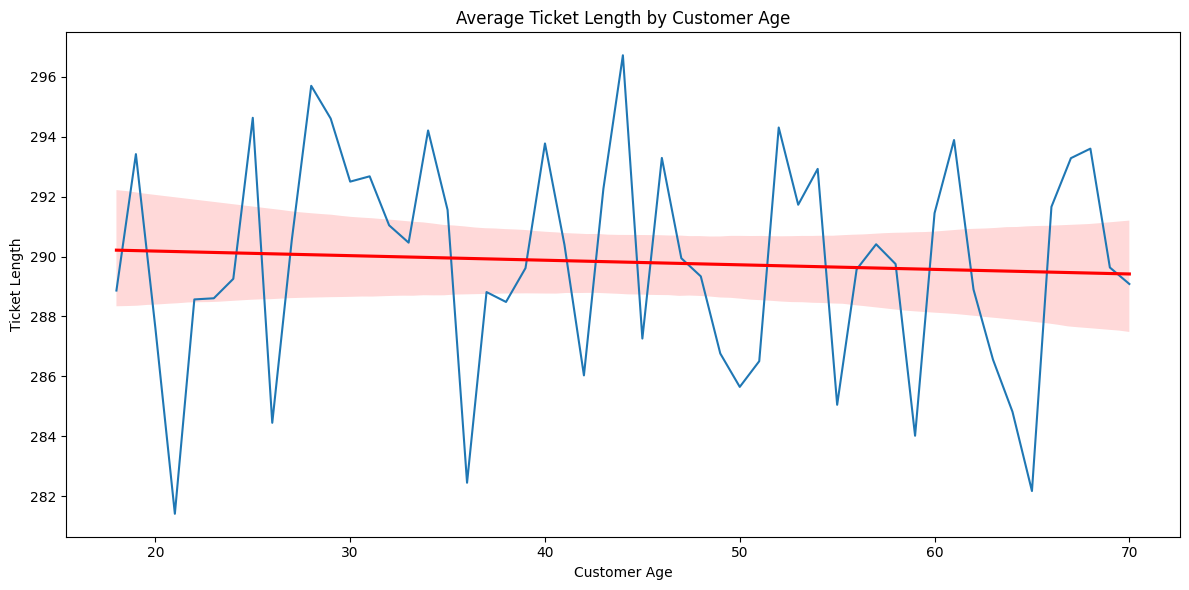

       Customer Age  Ticket Length
count     53.000000      53.000000
mean      44.000000     289.814471
std       15.443445       3.598245
min       18.000000     281.419753
25%       31.000000     287.612717
50%       44.000000     289.748428
75%       57.000000     292.673913
max       70.000000     296.710983


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Calculate the length of each ticket description
df['Ticket Length'] = df['Ticket Description'].apply(len)

# Group by age and calculate mean ticket length
age_ticket_length = df.groupby('Customer Age')['Ticket Length'].mean().reset_index()

# Sort by age
age_ticket_length = age_ticket_length.sort_values('Customer Age')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Customer Age', y='Ticket Length', data=age_ticket_length)

plt.title('Average Ticket Length by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Ticket Length (characters)')

# Add a trend line
sns.regplot(x='Customer Age', y='Ticket Length', data=age_ticket_length, scatter=False, color='red')

plt.tight_layout()
plt.show()

# Print some statistics
print(age_ticket_length.describe())

In [ ]:
df_ticket['Customer Age'].describe()

,Customer Age
count,8469.000000
mean,44.026804
std,15.296112
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


In [ ]:
age = []
for i in df_ticket['Customer Age']:
    if i<=30:
        age.append('Young Customer')
    elif 30<i<55:
        age.append('Middle Age Customer')
    else:
        age.append('Old Customer')
df_ticket['Type of Customer'] = age

In [ ]:
df_ticket.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Social media,2023-06-01 12:15:36,No resolution,No rating,Middle Age Customer
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Chat,2023-06-01 16:45:38,No resolution,No rating,Middle Age Customer
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Middle Age Customer
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Young Customer
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Old Customer


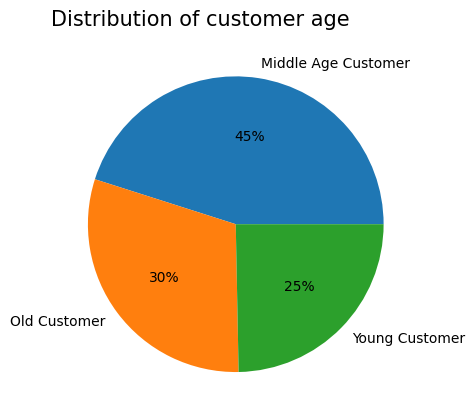

In [ ]:
chart_age = df_ticket['Type of Customer'].value_counts()
plt.pie(chart_age, labels = chart_age.index, autopct='%.0f%%')
plt.title('Distribution of customer age', loc = 'left', pad = 10, size = 15)
plt.show()

Text(0.0, 1.0, 'Distribution of customer gender')

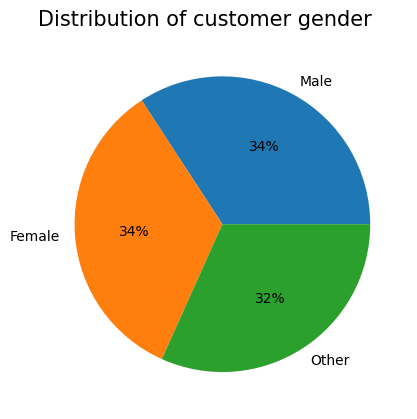

In [ ]:
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.pie(chart_gen, labels = chart_gen.index, autopct='%.0f%%')
plt.title('Distribution of customer gender', loc = 'left', pad = 10, size = 15)

In [ ]:
df_ticket

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Social media,2023-06-01 12:15:36,No resolution,No rating,Middle Age Customer
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Chat,2023-06-01 16:45:38,No resolution,No rating,Middle Age Customer
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Middle Age Customer
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Young Customer
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Old Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,None,Low,Phone,No response,No resolution,No rating,Young Customer
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,None,Critical,Email,No response,No resolution,No rating,Young Customer
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,Old Customer
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,Middle Age Customer


In [ ]:
df_ticket.describe()

,Ticket ID,Customer Age,Date of Purchase
count,8469.000000,8469.000000,8469
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024
min,1.000000,18.000000,2020-01-01 00:00:00
25%,2118.000000,31.000000,2020-07-02 00:00:00
50%,4235.000000,44.000000,2020-12-31 00:00:00
75%,6352.000000,57.000000,2021-07-01 00:00:00
max,8469.000000,70.000000,2021-12-30 00:00:00
std,2444.934048,15.296112,NaN


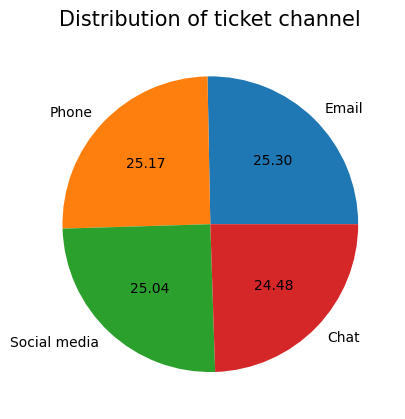

In [ ]:
chart_chan = df_ticket['Ticket Channel'].value_counts()
plt.pie(chart_chan, labels = chart_chan.index, autopct = '%.2f')
plt.title('Distribution of ticket channel', loc = 'center', pad = 10, size = 15)
plt.show()


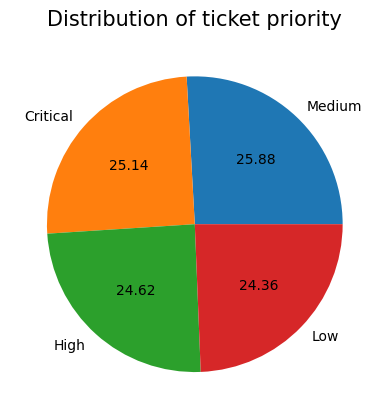

In [ ]:
chart_prio = df_ticket['Ticket Priority'].value_counts()
plt.pie(chart_prio, labels = chart_prio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

In [ ]:
#Convert 'Customer Satisfaction Rating' columns into object type
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].astype('object')
df_ticket['Customer Satisfaction Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8469 entries, 0 to 8468
Series name: Customer Satisfaction Rating
Non-Null Count  Dtype 
--------------  ----- 
8469 non-null   object
dtypes: object(1)
memory usage: 66.3+ KB


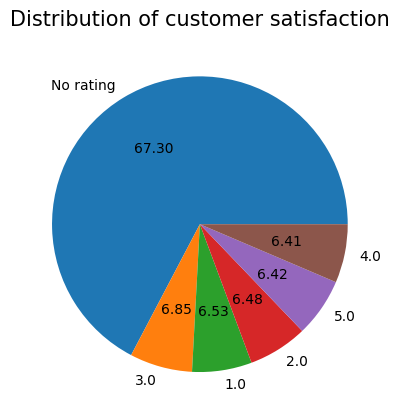

In [ ]:
chart_satis = df_ticket['Customer Satisfaction Rating'].value_counts()
plt.pie(chart_satis, labels = chart_satis.index, autopct = '%.2f')
plt.title('Distribution of customer satisfaction', loc = 'center', pad = 10, size = 15)
plt.show()

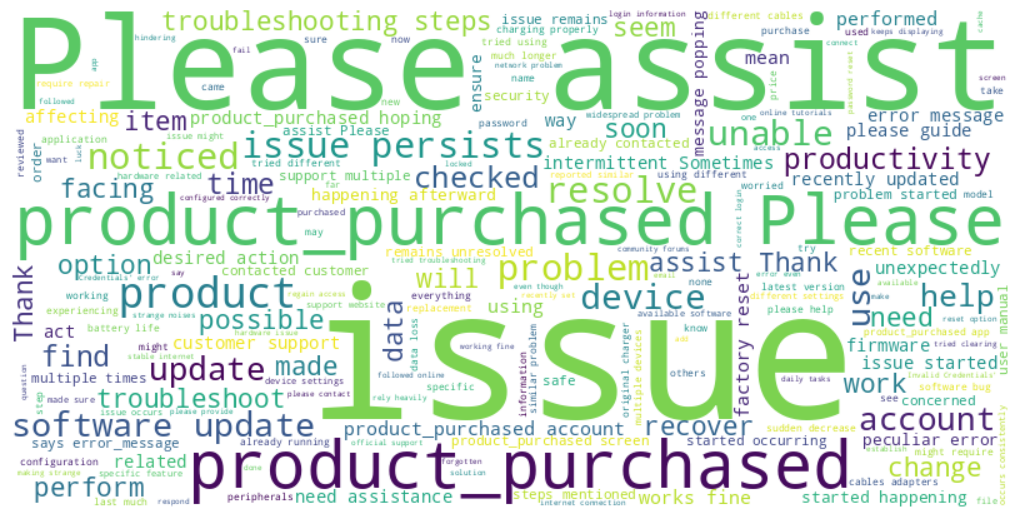

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('customer_support_tickets.csv')
text = ' '.join(df['Ticket Description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
